# 0. Tips data EDA (*)
In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the load_dataset method in seaborn module. The goal will be to use polynomial linear regression to predict tips.
####  * a) Start by doing some initial EDA such as info(), describe().
####  * b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).
####  * c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.
####  * d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context



df = sns.load_dataset("tips")
print(df.info(), df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

<Axes: >

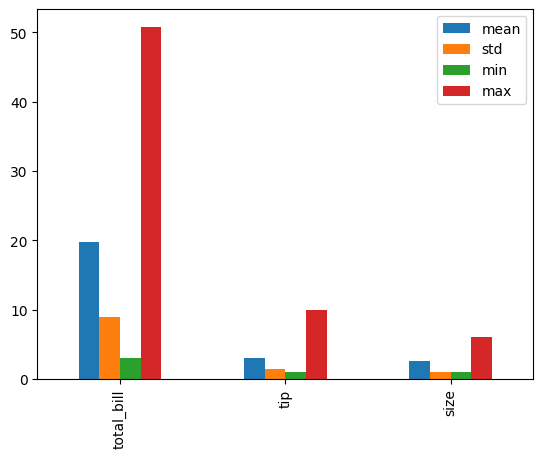

In [6]:
df.describe().T.drop(["count","25%","50%","75%"],axis="columns").plot(kind="bar")

## * c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.

####  * c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.
####  * d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.